In [85]:
%matplotlib inline

In [43]:
from planet4 import io, plotting, markings

In [44]:
db = io.DBManager()

In [3]:
ids = db.image_ids

In [79]:
sample = np.random.choice(ids, 300)

In [80]:
results = []
for s in sample:
    d = {}
    d['image_id'] = s
    data = db.get_image_id_markings(s)
    unique_users = data.user_name.nunique()
    d['n_users'] = unique_users
    not_logged_in_users = []
    logged_in_users = []
    for user in data.user_name.unique():
        val = len(data[data.user_name==user])
        if user.startswith('not-logged-in'):
            not_logged_in_users.append(val)
        else:
            logged_in_users.append(val)
    d['logged_in'] = np.mean(logged_in_users)
    d['not_logged_in'] = np.mean(not_logged_in_users)
    results.append(d)

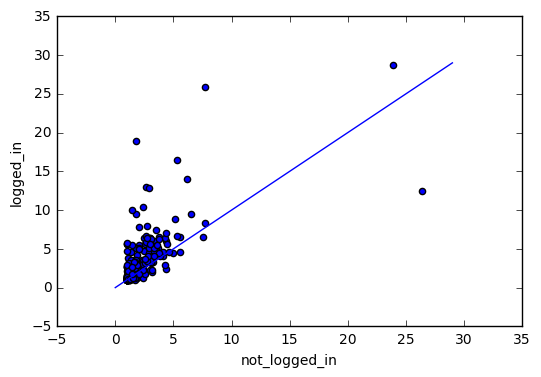

In [86]:
pd.DataFrame(results).plot(kind='scatter', x='not_logged_in', y='logged_in')
plt.plot(np.arange(30), np.arange(30))